In [1]:
%matplotlib inline
import cv2
from skimage import io
import matplotlib.pyplot as plt 
import os
from PIL import Image
import numpy as np


filenames = []
def load_images_from_folder(folder):
    images = []
    index = 0
    for filename in os.listdir(folder):
        print(index, filename)
        index+=1
        filenames.append(filename)
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            img
        images.append(img)

    return images
# def process_image﴾img﴿:
plt.ion() # interactive mode
filenames.sort()

In [3]:
path = './imgs'
imgs = load_images_from_folder(path)


0 img9.jpg
1 img8.jpg
2 img5.jpg
3 img4.jpg
4 img6.jpg
5 img7.jpg
6 img3.jpg
7 img2.jpg
8 img1.jpg
9 img10.jpg


In [5]:
def getOutputRGBOfPixel(h,s,v):
    r, g, b = 255, 255, 255
    if h < 54 or h > 90:
        r, g, b = 0, 0, 0
    if h < 84 and s > 3.5 and v > 70:
        r, g, b = 0, 0, 0
        
    return r,g,b

def getHSVOfPixel(hsvImage, row, col):
    pixelHSV = hsvImage.getpixel((row, col))
    h, s, v = pixelHSV
    s /= 255.0
    s *= 100.0
    s = round(s, 2)
    v /= 255.0
    v *= 100.0
    v = round(v, 2)

    return h,s,v

def __getGreenIndex__(image):
    width, height = image.size
    width += 0.0
    height += 0.0
    histogram = np.array(image.histogram())

    greenIndex = histogram[256:512][255]
    greenIndex /= width*height
    
    return greenIndex

def calculateG(img,originalFile):
    
    img_orig=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     plt.figure()
#     plt.plot(), plt.imshow(img_orig)

    originalRGBImage = Image.open(path + '/'+ originalFile)
    
    width, height = originalRGBImage.size[0], originalRGBImage.size[1]
    
    pixelCount = width * height
    hsvImage = originalRGBImage.convert('HSV')

    for row in range(width):
        for col in range(height):
            h,s,v = getHSVOfPixel(hsvImage, row, col)
            r,g,b = getOutputRGBOfPixel(h,s,v)
            originalRGBImage.putpixel((row,col), (r,g,b))
    
   
    greenIndex = __getGreenIndex__(originalRGBImage)
    print(originalFile, ',' , greenIndex)
#     plt.show()

for idx in range(len(imgs)):
    img = imgs[idx]
    calculateG(img, filenames[idx])

img9.jpg , 0.9714616929529211
img8.jpg , 0.67189849533847
img5.jpg , 0.5983945562679338
img4.jpg , 0.2607620931672083
img6.jpg , 0.05096357119236584
img7.jpg , 0.026001269719455954
img3.jpg , 0.0866324863177735
img2.jpg , 0.06929631551634666
img1.jpg , 0.035988546653229196
img10.jpg , 0.6249723031252753


In [6]:

def CalculateGreenIndex1(idx, imageArray):

    #Greenness index: G / (R + G + B)
    r = imageArray[:,:,0].flatten()
    g = imageArray[:,:,1].flatten()
    b = imageArray[:,:,2].flatten()
    
    print(filenames[idx], sum(g) / ( sum(r) + sum(g) + sum(b)))

for idx in range(0, len(imgs)):
    img = imgs[idx]
    CalculateGreenIndex1(idx, img)

img9.jpg 0.5123103959497182
img8.jpg 0.4571133220546739
img5.jpg 0.501198745783614
img4.jpg 0.35406894951794843
img6.jpg 0.33147488071066306
img7.jpg 0.3679984404519158
img3.jpg 0.3496781350828514
img2.jpg 0.3473593646684944
img1.jpg 0.34197218104768196
img10.jpg 0.45336994372458567


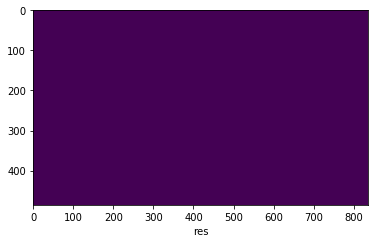

0.0 img9.jpg


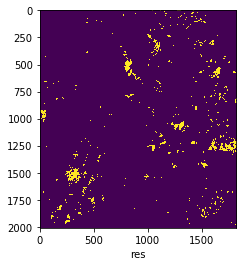

0.011226340969768274 img8.jpg


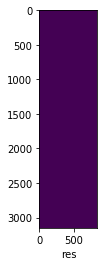

0.0 img5.jpg


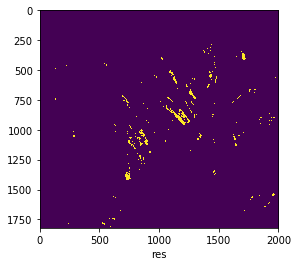

0.002846114311500199 img4.jpg


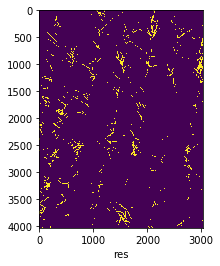

0.015100016665616865 img6.jpg


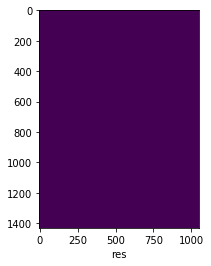

0.0 img7.jpg


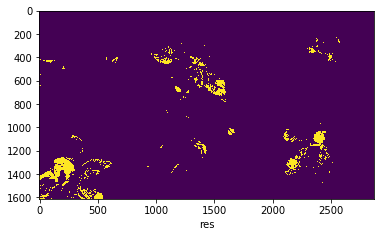

0.01121899343771885 img3.jpg


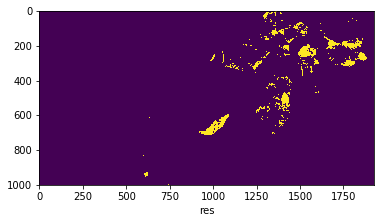

0.009039439543331603 img2.jpg


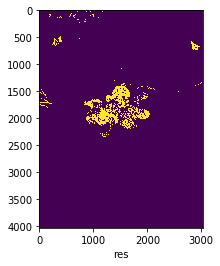

0.011423328976652389 img1.jpg


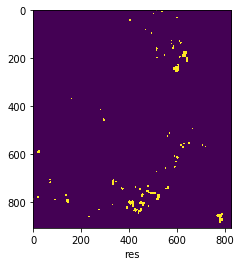

0.0026455520821375847 img10.jpg


In [10]:
def calculateGreenWithCV2(img, filename):
    
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    #hsv = hue saturation value
    lower_green = np.array([45,80,100])
    upper_green = np.array([70,255,255])
    
    mask = cv2.inRange(hsv, lower_green, upper_green)
    res = cv2.bitwise_and(img, img, mask=mask)
    
    kernel = np.ones((15,15), np.float32)/225
    smoothed = cv2.filter2D(res, -1, kernel)
    blur = cv2.GaussianBlur(res, (15, 15), 0)
    kernelErrosion = np.ones((5,5), np.uint8)
    dilation = cv2.dilate(mask, kernelErrosion, iterations = 1)

    plt.plot(),plt.imshow(dilation),plt.xlabel(filenames[idx])
    plt.xlabel('res')
    plt.show()
    greenCount = np.count_nonzero(res)
    total = img.size
    print(greenCount/total, filename)

for idx in range(0, len(imgs)):
    img = imgs[idx]
    calculateGreenWithCV2(img, filenames[idx])

In [ ]:
def edgeDetection(img, idx):
    #split the image into blue, green, and red channels
    b,g,r = cv2.split(img) 
    #here we 'amplify' the color green to stand out, without red/blue
    gscale = 2*g-r-b #we are going to refer to this as our grayscale img
    #Canny edge detection 
    gscale = cv2.Canny(gscale,280,290,apertureSize = 3)
    #checking the results (good practice)
    plt.figure()
    plt.plot(), plt.imshow(img)
    plt.figure()
    plt.plot(), plt.imshow(gscale)
    plt.title('Canny Edge-Detection Results')
    plt.xticks([]), plt.yticks([])
    plt.xlabel(filenames[idx])
    plt.show()
    filenames[idx]
    size = np.size(gscale) #returns the product of the array dimensions
    skel = np.zeros(gscale.shape,np.uint8) #array of zeros
    ret,gscale = cv2.threshold(gscale,128,255,0) #thresholding the image
    element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
    done = False


    while(not done):
        eroded = cv2.erode(gscale,element)
#         print(eroded)
        temp = cv2.dilate(eroded,element)
#         print(temp)
        temp = cv2.subtract(gscale,temp)
        skel = cv2.bitwise_or(skel,temp)
        gscale = eroded.copy()

    zeros = size - cv2.countNonZero(gscale)

    if zeros == size:
        done = True
    lines = cv2.HoughLines(skel,1,np.pi/180,130)

    a,b,c = lines.shape

    for i in range(a):
        rho = lines[i][0][0]
        theta = lines[i][0][1]    
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2, cv2.LINE_AA)

    #showing the results:
    plt.subplot(121)
    #OpenCV reads images as BGR, this corrects so it is displayed as RGB
    plt.plot(),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 
    plt.title('Row Detection'), plt.xticks([]), plt.yticks([])
    plt.subplot(122)
    plt.plot(),plt.imshow(skel,cmap='gray')
    plt.title('Skeletal Image'), plt.xticks([]), plt.yticks([])
    plt.show()
    
for idx in range(0, len(imgs)):
    img = imgs[idx]
    edgeDetection(img, idx)